# Smoothing

In this tutorial, we shows how to smooth spectra along one dimension (another tutorial will be devoted to 2-D
smoothing)
and gives informations on the algorithms used in Spectrochempy.

We first import spectrochempy, the other libraries used in this tutorial, and a sample dataset (
nh4y-activation.spg) from which we extract a noisy part:

In [1]:
import spectrochempy as scp
import numpy as np

"<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABgAAAAYCAYAAADgdz34AAAAAXNSR0IArs4c6QAAAAlw SFlzAAAJOgAACToB8GSSSgAAAetpVFh0WE1MOmNvbS5hZG9iZS54bXAAAAAAADx4OnhtcG1ldGEgeG1sbnM6eD0iYWRvYmU6bnM6 bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDUuNC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8x OTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIKICAgICAgICAgICAg eG1sbnM6eG1wPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvIgogICAgICAgICAgICB4bWxuczp0aWZmPSJodHRwOi8vbnMu YWRvYmUuY29tL3RpZmYvMS4wLyI+CiAgICAgICAgIDx4bXA6Q3JlYXRvclRvb2w+bWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4wLCBo dHRwOi8vbWF0cGxvdGxpYi5vcmcvPC94bXA6Q3JlYXRvclRvb2w+CiAgICAgICAgIDx0aWZmOk9yaWVudGF0aW9uPjE8L3RpZmY6 T3JpZW50YXRpb24+CiAgICAgIDwvcmRmOkRlc2NyaXB0aW9uPgogICA8L3JkZjpSREY+CjwveDp4bXBtZXRhPgqNQaNYAAAGiUlE QVRIDY1We4xU1Rn/3XPuYx47u8w+hnU38hTcuoUEt/6D2y4RB0ME1BoEd9taJaKh9CFiN7YGp7appUAMNmktMZFoJTYVLVQ0smsy 26CN0SU1QgsuFAaW3WVmx33N677O6XfuyoIxTXqSO/fec+75fd93vt/3/UbDV0aKSZmCpkFMLz3T9utuu2N+o98aDSMBKVAo89z5 y+zEz3ZafcCOfvWdlGCalqKn1Bf71CygTd+mf1esSOnpdMpTb+vWpTZuWVfe3jLPa5tzHYNm0T5N0gpdkkHaDBeGBU6d1/t/fyS8 +/CbqdfUvmsx1PuMgc2bNxv79u1zgd31r+7JH1jbIZKxWRXAcYUQ8IWvBfBXNjEuJWPgMA02NR7C3/pYT9fjdZ3A9tGrWF8YSJHn qcDz3y7q2T967PZv+gnYJdd1mEZ+62zGDQV/dQgKhmLzDNOXCEWM3j6eTT5Y3w78dOBKJLR1PQf+4ivPj76UPZnssBN+wbM9Aet/ AV81Mf1EEULXYfOobvX2WWQk0aoioXwwSmirOlioY0mu8BIouzYl7P8GV3vpqCCEZvlFz769w08oLDWvyKIyL1asSm28d6WfzA97 ztvvV1kexUMsmhlkULEkuGYmFYC6AvfUrITnwUKl5K79lkjeSSRRTCTbQPd95e1WzMbZSya74XoXAxctCllCnbECMOjZNGRwvzIX nD85wbkMmKK+U045Dtdi8Qp+SAxU2GTg2bYlC9224pgvmSb54vkVTBQYyhUt2KjAMyMmPjwRQW5Mh2WKwJhlBh6jVGagFM84wZnQ 4bpC0Rt4pk1PbSt0NDcxDA5xryosDHWgtbM0DGZDWLSoiDMDYeQnGVrmOThxLozB0RAaahzkJzjKNqcIQBymJFMkOlN8Dqjpg0XY Tx5xO/QbmmUrqIjGJznq47TqTaClKYfjp+PInLMwnOdYvtQBZ2XcunQY+VwIo4U4muoFEjVEFE6lQyEUKzHYfgQG9ylCyngU+Cxj tOqxCDGHcCsOMCs6iQul5ZiStdATYxjMZXDLTUVwLY8Jey4uOh2IxjwsrP8UXJYxUrkZrghBahzV5iXU6gNkq0Z1EzIsUBUSCV2n EOHo0LVxHCpuxabJJdhi5PFnvw5vLXwXIfNZvD/+JNo/X40NegE54sUaazl+UL8XD1x+FB9Ijjt4EQfdGN6J/x131LwIV9ap/AYs 0x1fz1ZKFbh6A7qKy/By9Dg6G36Ep91vUJJ15Cqr0Z67E8/HzmBrw1OwxWyM+3Mo6BAuSB17oyfx0Oyl2DN0Hqs/70Cx6hBCvESF UY1ShWXZZEE7OTAYxZzaPH4TuoiusZvRnunFy2NbiHYuBp2vB66srX4vMEjpRKPxKXmnoQ4+Mn4DPiv8CYcrs3GfNUXJLtM+alSO hrMj/KT+wBNW3+E/2liywNO3iSflbaFva/+stGDTxE0E9Sjaox8HBhxpEamzMGSEaFKg+mjEddzDh1MxTDq3YV1kGBsjfwW3S9Cq anjmko+ndlb1UR3s6K8JlfphNWq9Ew/7c61T2BB/EbcaNkb8GBaE0tANH7/M34PLdhJDzjIcL9xPbdTG6zyM72Y+wXPHmvB489No fm0b5HnbQ9Rgp/7DSSd29AeVvPeNyK6JcYl/yQVi5dBjuGvoV/gaJe47s45QUxrDmcYX0MBsdF7egvXZ7+O0vZA4X8QmOQWjlSK7 RDz5wIM30gp9UbWcGjXxhzdDu1SiNSpx6kcQB57rPnr/3dlkZarWLnlRq5oPET1dOCIOk4wALib9eeS5iygfhkd09H0DWphB/+gs +PcOAS+ssrFmmXXgVfR0de9cpbAJfH3Q1jofW9DZk56dDcVsq9YcsoUMEd1qyLoT3BX1YiyHMJuk97hyjqIoE91t+NcTLeN0ZrfM oXatZbu6G0h4VG+ibqq0IJVK6cAjo6serG3vSUezCMct0yQeSOFJSUImqb2qbknUpDqlZxE0QZ+ZUpSlZx79h4Nda6zef9dlk121 JDjbR5XggPRZlRnS6bRQRtLpn4++cuie/Yvn2svmNxuLw9WCcYIl4fEoTEGiSTUqJdfgU+8ROqf1iMkLzS389YtNPXc/PH8l8ONB JZkHD+4JtD04HmVEDWWErmBhzV2/2LB1bemJG6krzv2S6NOHUgtEP0Oif5pE/3fHoruP7N8RiP61GArzSwbUhJJQpXJKiKbfr/3b IhKq76sKPUdF9NW/LSqfSn6vjv8C45H/6FSgvZQAAAAASUVORK5CYII=' style='height:25px; border-radius:12px; display:inline-block; float:left; vertical-align:middle'>",SpectroChemPy's API - v.0.2.17rc1.dev2© Copyright 2014-2021 - A.Travert & C.Fernandez @ LCS


In [2]:
X = scp.read_omnic("irdata//nh4y-activation.spg")  # import spectra
X = X[
    0:5, 3600.0:2800.0
]  # select a noisy part (the first 5 spectra in the 3700-2800 cm-1 range)

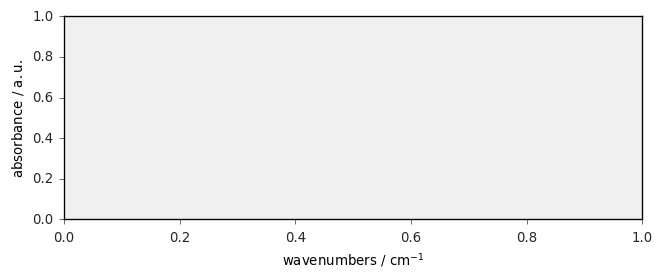

In [3]:
prefs = X.preferences
prefs.figure.figsize = (7, 3)

ax = X.plot()  # plot

In this tutorial we will apply smoothing of the
spectra along the wavlength dimension. These methods are based on window functions, which ptototype is the *moving
average*.

## The `smooth()` method

The `smooth()` method is adapted from the ["Smoothing of a 1D signal" code](
https://scipy-cookbook.readthedocs.io/items/SignalSmooth.html) of the [Scipy cookbook](
https://scipy-cookbook.readthedocs.io/). It is a (weighted)-moving average method and consist in the convolution of
a window of a given length with the spectrum.

In its simplest form - *i.e.* unweighted moving average - each absorbance at a given wavenumber of the smoothed
spectrum is the average of the aborbances at the the absorbance at the considered wavenumber and the N neighboring
wavenumbers (*i.e.* N/2 before and N/2 after), hence the conventional use of an odd number of N+1 points to define
the window length. For the points located at both end of the spectra, the extremities of the spectrum are mirrored
beyond the initial limits so as to minimize boundary effects.

When passed as is, i.e. `X.smooth()`, the method uses a moving average of 5 points:

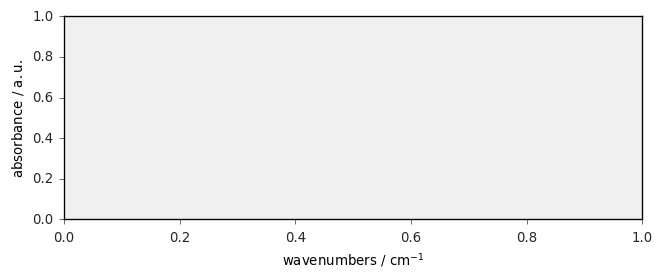

In [4]:
ax = X.smooth().plot()

### Window length

The following code compares the influence of the window size on the smoothing of the first spectrum of the
NDDataset `X[0]`.

Loop over window lengths. i index will run from 0 to 6.

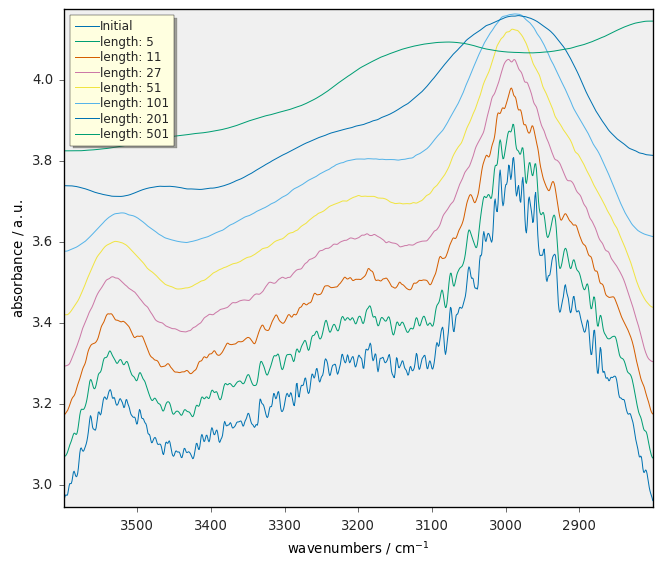

In [5]:
lspectra = [
    X[0],
]
llabels = [
    "Initial",
]
for i, length in enumerate([5, 11, 27, 51, 101, 201, 501]):
    s = X[0].smooth(window_length=length)  # smooth
    s += 0.1 * (
        1 + i
    )  # shift the absorbance by +0.1 a.u. with respect to previous iteration
    lspectra.append(s)
    llabels.append(f"length: {length}")

ax = scp.plot_multiple(
    figsize=(7, 6), method="pen", datasets=lspectra, labels=llabels, legend="upper left"
)

the spectrum are flattened out and distorted. When determining the optimum window length, one should thus consier
the balance between noise removal and signal integrity: the larger the window length, the stronger the smoothing,
but also the greater the chance to distort the spectrum.

### Window function

Besides the window `length` (default=11 points), the user can also choose the type of
window (`window`) from `flat`, `hanning` (i.e. Hann window), `hamming`, `bartlett` or `blackman`.  The `flat`
window - which is the default shown above - should be fine for the vast majority of cases.

The code below compares the effect of the type of window:

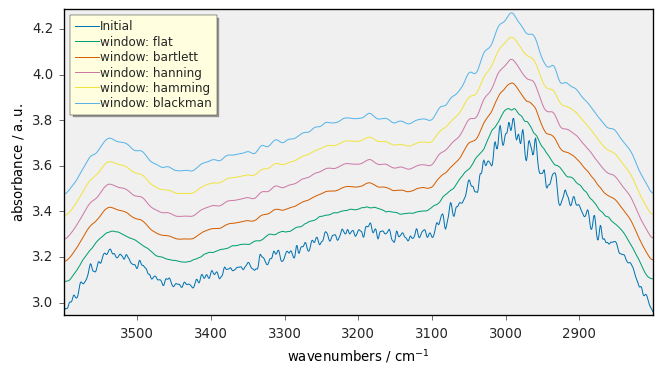

In [6]:
wspectra = [
    X[0],
]
wlabels = [
    "Initial",
]
for i, window in enumerate(["flat", "bartlett", "hanning", "hamming", "blackman"]):
    s = X[0].smooth(window_length=27, window=window) + 0.1 * (1 + i)  # smooth and shift
    wspectra.append(s)
    wlabels.append(f"window: {window}")

ax = scp.plot_multiple(
    figsize=(7, 4), method="pen", datasets=wspectra, labels=wlabels, legend="upper left"
)

because the other window functions (also known as *apodization functions*) are used as weighting functions for the
N+1 points, with the largest weight on the central point and smaller weights for external points.

The window functions as used in SpectroChemPy are derived from the numpy library. These builtin functions are such
that the value of the central point is 1. Hence, as shown below,  they are normalised to the sum of weights. The
code below displays the corresponding normalized fucntions for 27 points:

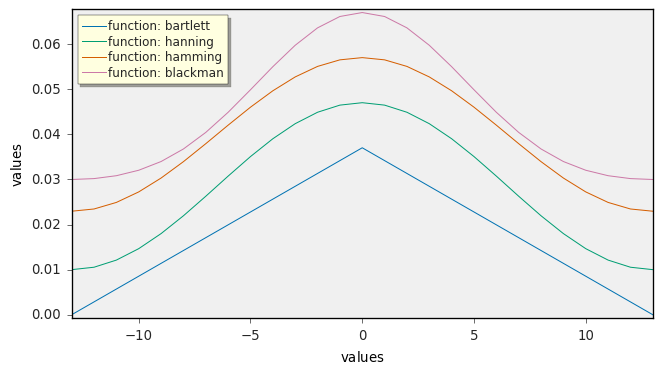

In [7]:
functions = []
labels = []
for i, f in enumerate([np.bartlett, np.hanning, np.hamming, np.blackman]):
    coord = scp.NDDataset.linspace(-13, 13, 27)
    s = scp.NDDataset(
        f(27) / np.sum(27) + i * 0.01, coordset=[coord]
    )  # normalized window function, y shifted : +0.1 for each function
    functions.append(s)
    labels.append(f"function: {f.__name__}")

ax = scp.plot_multiple(
    figsize=(7, 4), method="pen", datasets=functions, labels=labels, legend="upper left"
)

fonctions (`hanning`, `hamming`, `blackman`) are bell-shaped. More information on window funcntions can be found [
here](https://en.wikipedia.org/wiki/Window_function).

Overall, the impact of the window function on the final spectrum is moderate, as can be shown by comparing the
differences (noisy spectrum *minus* smoothed spectra and the standard deviation along dimension x:

(0.0, 0.8)

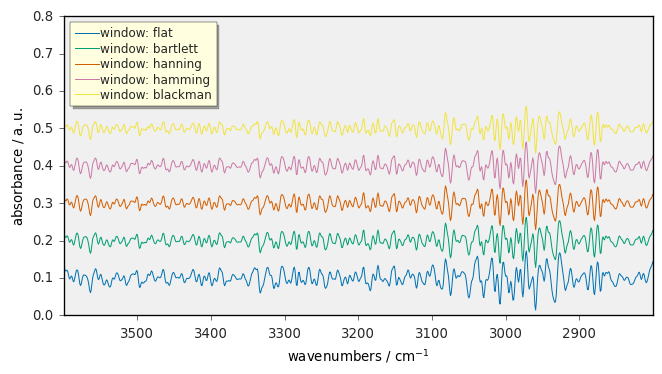

In [8]:
diffs = []
stds = []
labels = wlabels[1:]
for s in wspectra[1:]:
    s = s - X[0]
    diffs.append(s)
    stds.append(s.std(dim="x").values.m)
ax = scp.plot_multiple(
    figsize=(7, 4), method="pen", datasets=diffs, labels=labels, legend="upper left"
)
ax.set_ylim(0, 0.8)

and the standard deviations (the largest the value, the stronger the smoothing):

In [9]:
for ll, s in zip(labels, stds):
    print(f"{ll[7:]:10s}: {s:.4f}")

 flat     : 0.0202
 bartlett : 0.0166
 hanning  : 0.0163
 hamming  : 0.0167
 blackman : 0.0151


## Savitzky-Golay algorithm:`savgol_filter()`

The second algorithm implemented in spectrochempy is the Savitzky-Golay filter which uses a polynomial
interpolation in the moving window. A demonstrative illustration of the method can be found on the [Savitzky-Golay
filter](https://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter) entry of Wikipedia.

The function implemented in spectrochempy is a wrapper of the [savgol_filert() method](
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.savgol_filter.html) from the [scipy.signal](
https://docs.scipy.org/doc/scipy/reference/signal.html) module to which we refer the interested reader. It not only
used to smooth spectra but also to compute their successive derivatives. The latter are treated in [the
peak-finding tutorial](../analysis/peak_finding.ipynb) and we will focus here on the smoothing which is the default
of the filter (default parameter: `deriv=0`).

As for the `smooth()` method, it is a moving-window based method. Hence, the window length (`window_length`
parameter) plays an equivalent role, except that it *must* be odd. Moreover, instead of choosing a window function,
the user can choose the order of the polynomial used to fit the window data points (`polyorder`, default value: 0).
The latter must be strictly smaller than the window size (so that the polynomial coefficients can be fully
determined).

The use of this method is illustrated below, we leave to the reader to assess the impact of the window length and
polynomial order (see Exercises below)

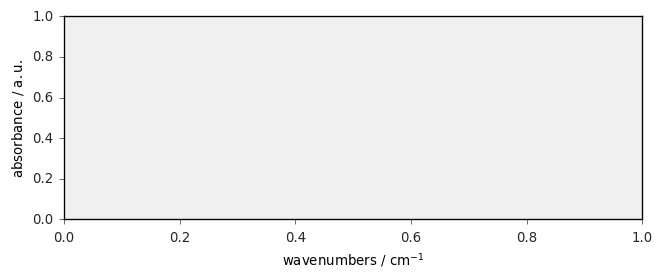

In [10]:
_ = X.savgol_filter(window_length=5, polyorder=0).plot()

<div class='alert alert-info'>
<b>Exercises</b>

<em>intermediate</em>: - what would be the parameters to use in the `savogol_filter()` method to mimic `smooth()`?
Write a
code to check your answer - examine the impacts of `window_length` and `polyorder` on the extent of smoothing with
a Svitzky-Golay filter.
</div>